In [1]:
#importing all needed libraries and packages

import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#defining relative paths from root directory of this python notebook

train_path = 'Train'
valid_path = 'Validation'
test_path = 'Test'

In [3]:
#getting training,validation and testing data

train_batches = ImageDataGenerator().flow_from_directory(train_path,color_mode = 'grayscale', target_size=(100,100), classes=['Open', 'Close'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,color_mode = 'grayscale', target_size=(100,100), classes=['Open', 'Close'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,color_mode = 'grayscale', target_size=(100,100), classes=['Open', 'Close'], batch_size=10)

Found 2080 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
#plots images with labels within jupyter notebook
#def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    #if type(ims[0]) is np.ndarray:
        #ims = np.array(ims).astype(np.uint8)
        #if (ims.shape[-1] != 1):
            #ims = ims.transpose((0,2,3,1))
    #f = plt.figure(figsize=figsize)
    #cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    #for i in range(len(ims)):
      #  sp = f.add_subplot(rows, cols, i+1)
       # sp.axis('Off')
        #if titles is not None:
         #   sp.set_title(titles[i], fontsize=16)
        #plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)


In [6]:
#plots(imgs , titles = labels)

In [7]:
def makeModel():
    model = Sequential()
    #this model was inspired by the VGG 16 model that won the image net competition
    
    #model architecture is as follows
    
    #Input==>Conv(64) X 2 ==>maxpool==>Conv(128) X 2==> maxpool==> Conv(256) X 3 
    #     ==>maxpool ==> Conv(512) x 2 ==>unroll==>FC(1024)==>FC(1024)==>softmax(2)
    
    #other than output layer the other activations are RectifiedLinearUnits
 
    model.add(Conv2D(64, (3,3), padding = 'same',
                   input_shape=(100,100,1)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, (2,2), padding= 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (2,2), padding= 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (2,2), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (2,2), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (2,2), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(512, (2,2), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512, (2,2), padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
 
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(2))
    model.add(Activation('softmax'))
 
    
    model.compile(optimizer=Adam(lr=0.00008), 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
 
    return model

In [8]:
model = makeModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       32896     
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 128)       0         
__________

In [9]:
model.fit_generator(train_batches, steps_per_epoch=10, 
                    validation_data=valid_batches, validation_steps=4, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 23s 2s/step - loss: 2.1261 - acc: 0.5800 - val_loss: 0.6994 - val_acc: 0.4750
Epoch 2/50
10/10 [==============================] - 20s 2s/step - loss: 0.7093 - acc: 0.5100 - val_loss: 0.7251 - val_acc: 0.5250
Epoch 3/50
10/10 [==============================] - 20s 2s/step - loss: 0.6998 - acc: 0.5100 - val_loss: 0.6737 - val_acc: 0.5500
Epoch 4/50
10/10 [==============================] - 19s 2s/step - loss: 0.6957 - acc: 0.5300 - val_loss: 0.6746 - val_acc: 0.5500
Epoch 5/50
10/10 [==============================] - 20s 2s/step - loss: 0.6746 - acc: 0.5500 - val_loss: 0.6850 - val_acc: 0.4750
Epoch 6/50
10/10 [==============================] - 19s 2s/step - loss: 0.6522 - acc: 0.6300 - val_loss: 0.6575 - val_acc: 0.6500
Epoch 7/50
10/10 [==============================] - 20s 2s/step - loss: 0.6382 - acc: 0.6200 - val_loss: 0.6945 - val_acc: 0.5500
Epoch 8/50
10/10 [==============================] - 20s 2s/step - loss: 0.6126 - acc: 0.65

In [10]:
test_imgs, test_labels = next(test_batches)
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [11]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions
for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predictions[i][0]= 1
        predictions[i][1]= 0
    else:
        predictions[i][0]= 0
        predictions[i][1]= 1

In [12]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 0]
 [0 7]]


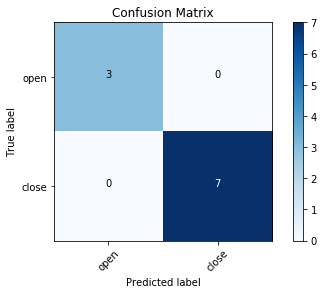

In [14]:
cm_plot_labels = ['open','close']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')